In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import math
from sklearn import metrics
import missingno as msno
import joblib
import pickle
#======== preprocessamneto ==========
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#===modelos=====================
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV


In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
#projeto sobre customer churn (cancelamento de clientes)

<h2>Análise Exploratória dos Dados e Limpeza de Dados</h2>

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
# traduzir os nomes das variaveis
df.set_axis(['clienteID', 'genero', 'idoso', 'companheiro_a', 'dependente',
       'posse_cliente', 'servico_tel', 'multiplos_tels', 'servico_internet',
       'seguro_online', 'backup_online', 'protecao_dispositivo', 'suporte_tecnico',
       'transmissao_tv', 'transmissao_Filmes', 'contrato', 'fatura_online',
       'metodo_pagamento', 'custo_mensal', 'custo_total', 'rotatividade'],axis='columns', inplace=True)

In [6]:
df.shape

(7043, 21)

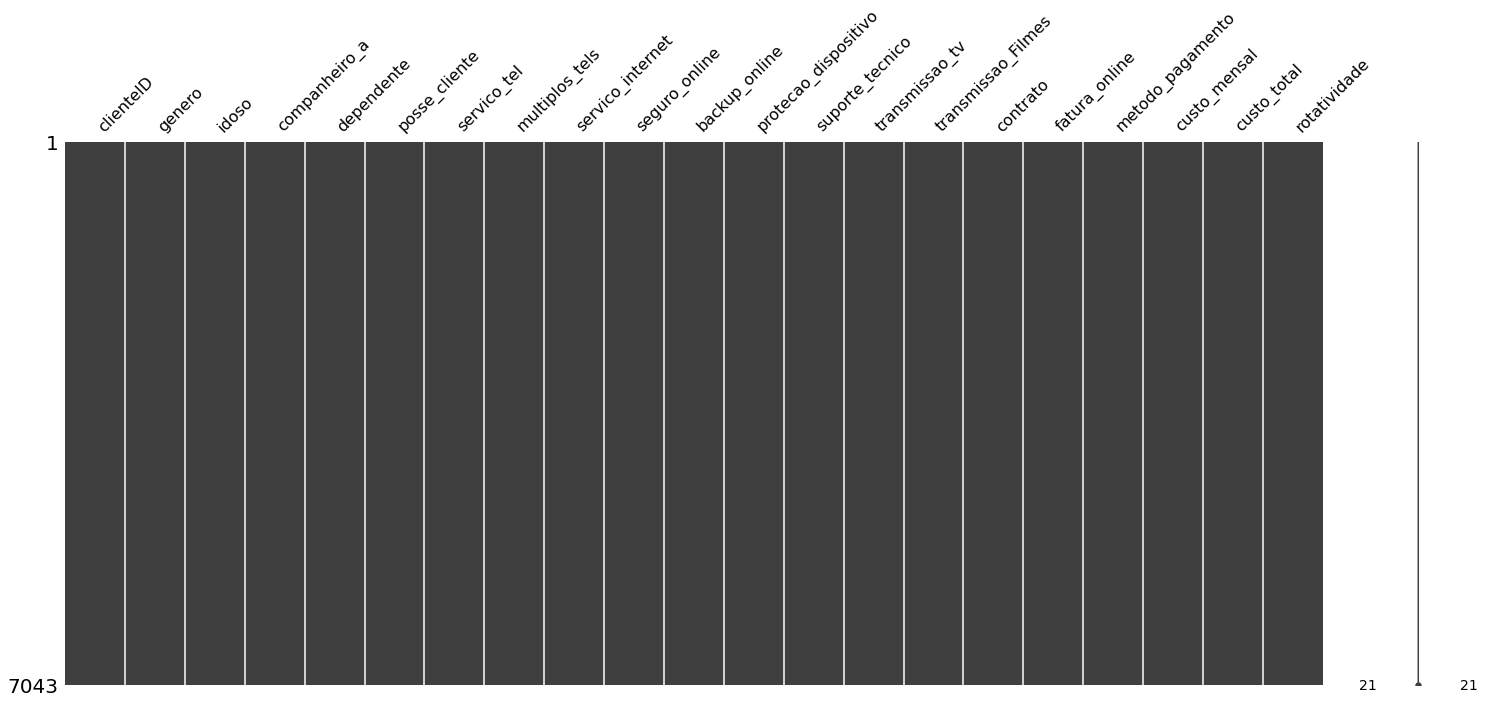

In [7]:
#verificando nulos com plot especifico
msno.matrix(df)
plt.show()

In [8]:
print(df['rotatividade'].value_counts())

No     5174
Yes    1869
Name: rotatividade, dtype: int64


In [9]:
df.describe()

,idoso,posse_cliente,custo_mensal
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
# verificando valores unicos de cada coluna
for column in df.columns:
    print('Column: {} - Unique Values: {}'.format(column, df[column].unique()))


Column: clienteID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: genero - Unique Values: ['Female' 'Male']
Column: idoso - Unique Values: [0 1]
Column: companheiro_a - Unique Values: ['Yes' 'No']
Column: dependente - Unique Values: ['No' 'Yes']
Column: posse_cliente - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: servico_tel - Unique Values: ['No' 'Yes']
Column: multiplos_tels - Unique Values: ['No phone service' 'No' 'Yes']
Column: servico_internet - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: seguro_online - Unique Values: ['No' 'Yes' 'No internet service']
Column: backup_online - Unique Values: ['Yes' 'No' 'No internet service']
Column: protecao_dispositivo - Unique Values: ['No' 'Yes' 'No internet service']
Column: s

In [11]:
#alterando valores em variaveis qualitativas
df=df.replace({ 'genero': {'Female':'mulher', 'Male': 'homem'}, 
             'metodo_pagamento': {'Electronic check':'eletronico', 'Mailed check': 'boleto'
                                  ,'Bank transfer (automatic)':'transferencia bancaria',
                                  'Credit card (automatic)':'cartao de credito'},
             'contrato': {'Month-to-month':'mes_a_mes', 'One year': '1 ano','Two year':'2 anos'},
               'idoso': {'0':'No', '1': 'Yes'}
              })

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clienteID             7043 non-null   object 
 1   genero                7043 non-null   object 
 2   idoso                 7043 non-null   int64  
 3   companheiro_a         7043 non-null   object 
 4   dependente            7043 non-null   object 
 5   posse_cliente         7043 non-null   int64  
 6   servico_tel           7043 non-null   object 
 7   multiplos_tels        7043 non-null   object 
 8   servico_internet      7043 non-null   object 
 9   seguro_online         7043 non-null   object 
 10  backup_online         7043 non-null   object 
 11  protecao_dispositivo  7043 non-null   object 
 12  suporte_tecnico       7043 non-null   object 
 13  transmissao_tv        7043 non-null   object 
 14  transmissao_Filmes    7043 non-null   object 
 15  contrato             

In [13]:
df.columns

Index(['clienteID', 'genero', 'idoso', 'companheiro_a', 'dependente',
       'posse_cliente', 'servico_tel', 'multiplos_tels', 'servico_internet',
       'seguro_online', 'backup_online', 'protecao_dispositivo',
       'suporte_tecnico', 'transmissao_tv', 'transmissao_Filmes', 'contrato',
       'fatura_online', 'metodo_pagamento', 'custo_mensal', 'custo_total',
       'rotatividade'],
      dtype='object')

In [14]:
df['custo_total'] = pd.to_numeric(df['custo_total'], errors='coerce')

In [15]:
df[df['custo_total'].isnull()]
#11 linhas com nulos

,clienteID,genero,idoso,companheiro_a,dependente,posse_cliente,servico_tel,multiplos_tels,servico_internet,seguro_online,...,protecao_dispositivo,suporte_tecnico,transmissao_tv,transmissao_Filmes,contrato,fatura_online,metodo_pagamento,custo_mensal,custo_total,rotatividade
488,4472-LVYGI,mulher,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,2 anos,Yes,transferencia bancaria,52.55,NaN,No
753,3115-CZMZD,homem,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,2 anos,No,boleto,20.25,NaN,No
936,5709-LVOEQ,mulher,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,2 anos,No,boleto,80.85,NaN,No
1082,4367-NUYAO,homem,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,2 anos,No,boleto,25.75,NaN,No
1340,1371-DWPAZ,mulher,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,2 anos,No,cartao de credito,56.05,NaN,No
3331,7644-OMVMY,homem,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,2 anos,No,boleto,19.85,NaN,No
3826,3213-VVOLG,homem,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,2 anos,No,boleto,25.35,NaN,No
4380,2520-SGTTA,mulher,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,2 anos,No,boleto,20.00,NaN,No
5218,2923-ARZLG,homem,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,1 ano,Yes,boleto,19.70,NaN,No
6670,4075-WKNIU,mulher,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,2 anos,No,boleto,73.35,NaN,No


In [16]:
df.dropna(inplace=True)
#dropando nulos

In [17]:
df.drop(columns='clienteID', inplace=True)
#dropando coluna id

<AxesSubplot:>

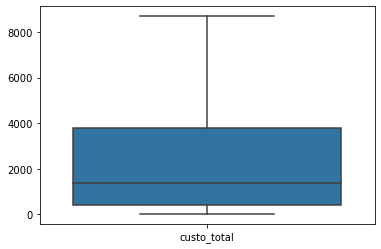

In [18]:
#verificar outliers
import seaborn as sns
sns.boxplot(data=df[['custo_total']],orient="v")


<AxesSubplot:>

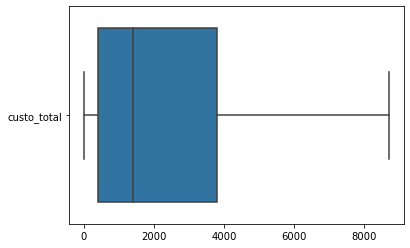

In [19]:
sns.boxplot(data=df[['custo_total']], orient="h")


<h2>visualizacao de dados</h2>

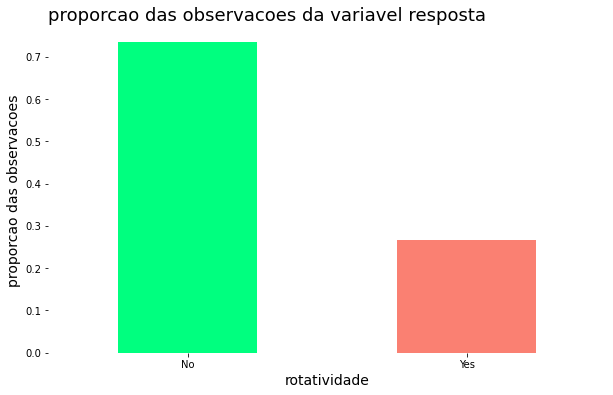

In [20]:
# criando a figura
fig = plt.figure(figsize=(10, 6)) 
ax = fig.add_subplot(111)

# proporcao de observacoes de cada classe
prop_response = df['rotatividade'].value_counts(normalize=True)

#criando um grafico de barras mostrando a porcentagem de rotatividade

prop_response.plot(kind='bar', 
                   ax=ax,
                   color=['springgreen','salmon'])

# definindo titulo e rotulos
ax.set_title('proporcao das observacoes da variavel resposta',
             fontsize=18, loc='left')
ax.set_xlabel('rotatividade',
              fontsize=14)
ax.set_ylabel('proporcao das observacoes',
              fontsize=14)
ax.tick_params(rotation='auto')

# eliminando o contorno do grafico
spine_names = ('top', 'right', 'bottom', 'left')
for spine_name in spine_names:
    ax.spines[spine_name].set_visible(False)

In [21]:
def grafico_empilhado(colunas_plot,titulo):

    
    numero_colunas = 2
    numero_linhas = math.ceil(len(colunas_plot)/2)

    # criando a figura
    fig = plt.figure(figsize=(14, 6 * numero_linhas)) 
    fig.suptitle(titulo, fontsize=22,  y=.95)
 

    #loop para cada nome de coluna criar um subplot
    for index, column in enumerate(colunas_plot, 1):

        # criando um subplot
        ax = fig.add_subplot(numero_linhas, numero_colunas, index)

        # calculando a porcentagem das observacoes da variavel resposta para cada grupo de variavel independente
        prop_by_independent = pd.crosstab(df[column], df['rotatividade']).apply(lambda x: x/x.sum()*100, axis=1)

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                 rot=0, color=['springgreen','salmon'])

        # definindo a legenda no campo superior direito
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title='rotatividade', fancybox=True)

        # definindo titulo e rotulos
        ax.set_title('proporcao de observacoes por ' + column,
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminando o contorno do grafico
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

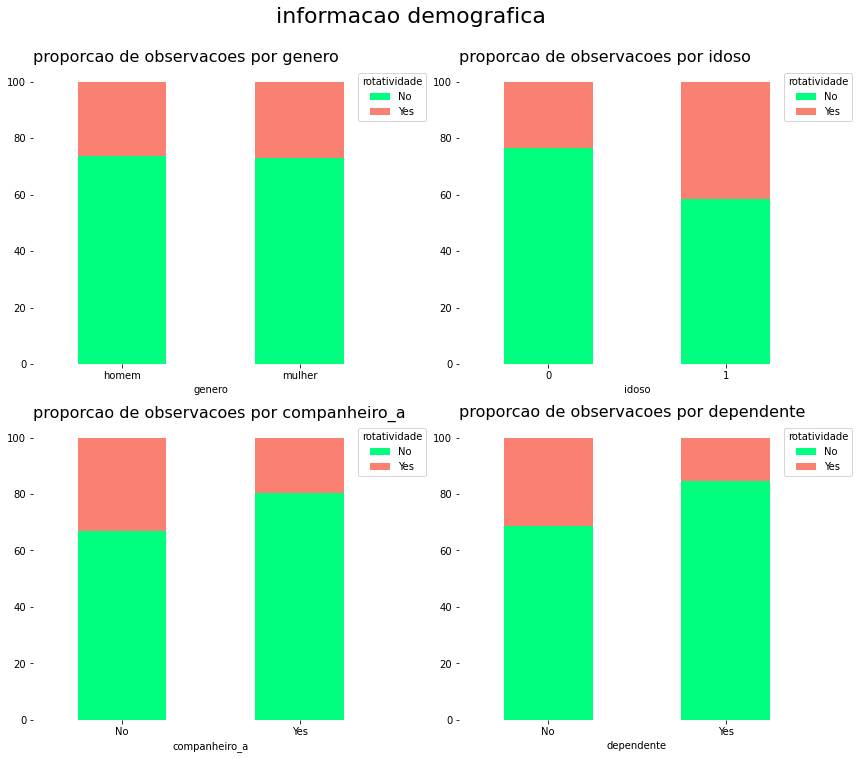

In [22]:
# colunas demograficas
coluna_demografica = ['genero', 'idoso', 'companheiro_a', 'dependente']

# grafico empilhado de colunas demograficas
grafico_empilhado(coluna_demografica, 'informacao demografica')

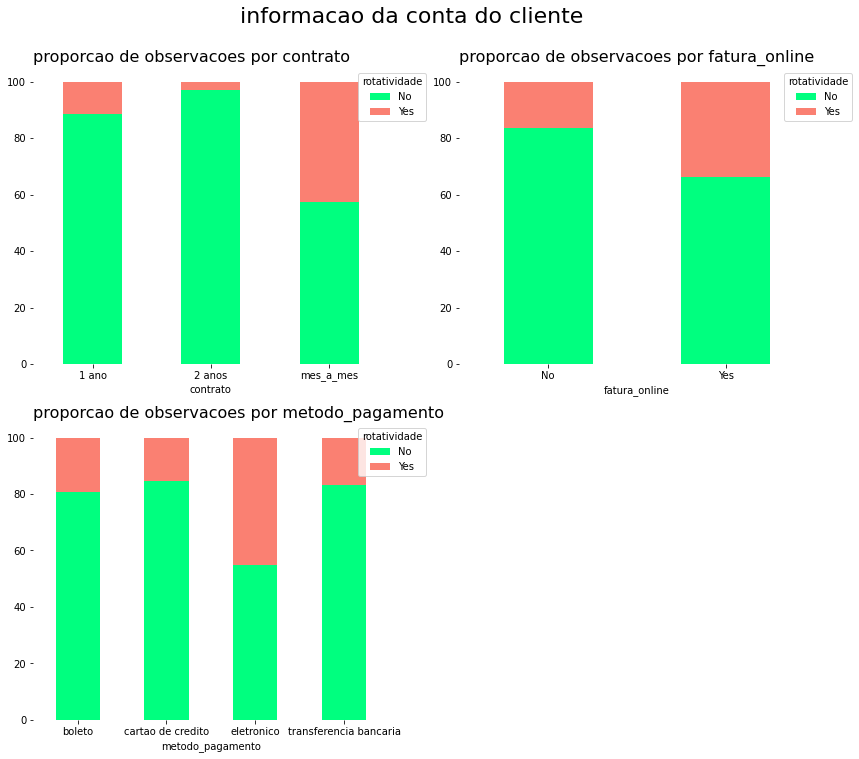

In [23]:
# colunas da conta
colunas_conta = ['contrato', 'fatura_online', 'metodo_pagamento']

# grafico empilhado de informacao da conta do cliente
grafico_empilhado(colunas_conta , 'informacao da conta do cliente')

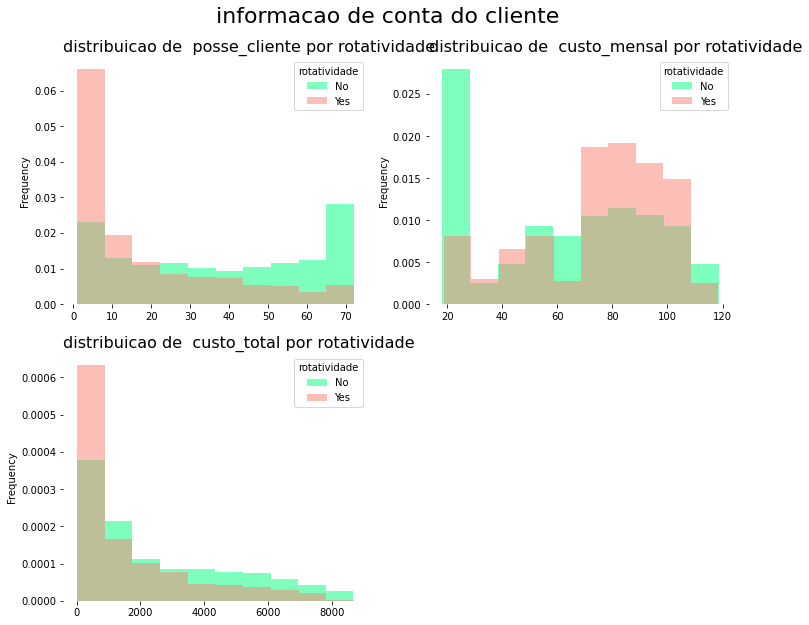

In [24]:
def graficos_histogramas(colunas, titulo):
    # definindo numero de linhas e colunas
    numero_colunas = 2
    numero_linhas = math.ceil(len(colunas)/2)

    fig = plt.figure(figsize=(12, 5 * numero_linhas)) 
    fig.suptitle(titulo, fontsize=22,  y=.95)
    # loop 
    for index, column in enumerate(colunas, 1):
        
        # criando subplot
        ax = fig.add_subplot(numero_linhas, numero_colunas, index)
        # histograma para cada classe
        
        df[df['rotatividade']=='No'][column].plot(kind='hist', ax=ax, density=True, 
                                                       alpha=0.5, color='springgreen', label='No')
        df[df['rotatividade']=='Yes'][column].plot(kind='hist', ax=ax, density=True,
                                                        alpha=0.5, color='salmon', label='Yes')
        
        ax.legend(loc="upper right", bbox_to_anchor=(0.5, 0.5, 0.5, 0.5),
                  title='rotatividade', fancybox=True)

        ax.set_title('distribuicao de  ' + column + ' por rotatividade',
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')
        # eliminando o contorno do grafico
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)
            
colunas_numericas = ['posse_cliente', 'custo_mensal', 'custo_total']
# histograma 
graficos_histogramas(colunas_numericas, 'informacao de conta do cliente')


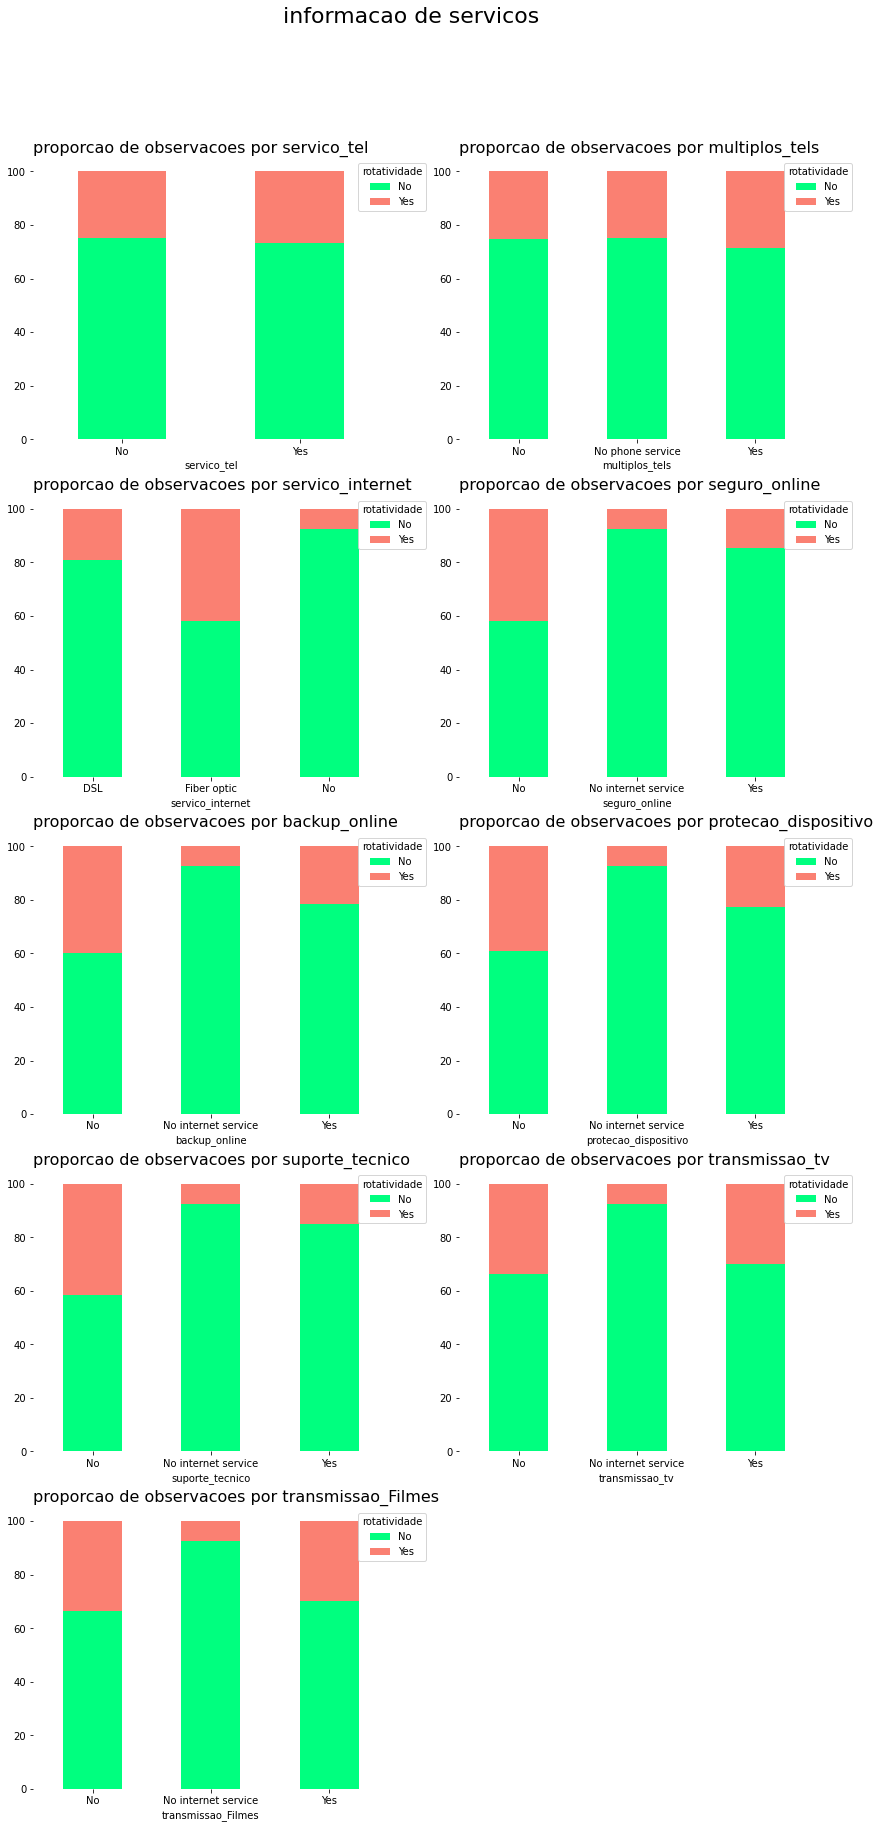

In [25]:
# colunas com nomes de servicos
colunas_servicos= ['servico_tel', 'multiplos_tels', 'servico_internet', 'seguro_online',
                   'backup_online', 'protecao_dispositivo', 'suporte_tecnico', 'transmissao_tv', 'transmissao_Filmes']

# grafico empilhado para colunas de servicos
grafico_empilhado(colunas_servicos, 'informacao de servicos')

In [26]:
df.columns

Index(['genero', 'idoso', 'companheiro_a', 'dependente', 'posse_cliente',
       'servico_tel', 'multiplos_tels', 'servico_internet', 'seguro_online',
       'backup_online', 'protecao_dispositivo', 'suporte_tecnico',
       'transmissao_tv', 'transmissao_Filmes', 'contrato', 'fatura_online',
       'metodo_pagamento', 'custo_mensal', 'custo_total', 'rotatividade'],
      dtype='object')

In [27]:
df2 = df.copy()

colunas_codigo = ['genero', 'companheiro_a', 'dependente', 'fatura_online', 'servico_tel', 'rotatividade']

# mudando rotulos
for column in colunas_codigo:
    if column == 'genero':
        df2[column] = df2[column].map({'mulher': 1, 'homem': 0})
    else: 
        df2[column] = df2[column].map({'Yes': 1, 'No': 0}) 

In [28]:
#one-hot encoding (variaveis categoricas com mais de 2 niveis)
one_hot_encoding_columns = ['multiplos_tels', 'servico_internet', 'seguro_online',
       'backup_online', 'protecao_dispositivo', 'suporte_tecnico',
       'transmissao_tv', 'transmissao_Filmes', 'contrato', 'metodo_pagamento']

# encode categorical variables with more than two levels using one-hot encoding
df2 = pd.get_dummies(df2, columns = one_hot_encoding_columns)

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   genero                                    7032 non-null   int64  
 1   idoso                                     7032 non-null   int64  
 2   companheiro_a                             7032 non-null   int64  
 3   dependente                                7032 non-null   int64  
 4   posse_cliente                             7032 non-null   int64  
 5   servico_tel                               7032 non-null   int64  
 6   fatura_online                             7032 non-null   int64  
 7   custo_mensal                              7032 non-null   float64
 8   custo_total                               7032 non-null   float64
 9   rotatividade                              7032 non-null   int64  
 10  multiplos_tels_No                   

In [41]:
# min-max normalizacao (variaveis numericas)
min_max_columns = ['posse_cliente', 'custo_mensal', 'custo_total']

for column in min_max_columns:
        min_column = df2[column].min()
        max_column = df2[column].max()
        df2[column] = (df2[column] - min_column) / (max_column - min_column)   


In [ ]:
# variaveis independentes
X = df2.drop(columns='rotatividade')

# variavel dependente
y = df2.loc[:, 'rotatividade']

# dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=40, shuffle=True)


In [32]:
#criando o modelo
linear = svm.SVC(kernel='linear',degree=4,decision_function_shape='ovo' ,gamma=1,C=1) 
poly= svm.SVC(kernel='poly',degree=4,decision_function_shape='ovo' ,gamma=1,C=1) 

linear.fit(X_test, y_test)
poly.fit(X_test, y_test)

#variavel preditiva
y_pred1 = linear.predict(X_test)
y_pred=poly.predict(X_test)

In [33]:
# Acuracia
print("Acuracia poly:",metrics.accuracy_score(y_test, y_pred))
print("Acuracia linear:",metrics.accuracy_score(y_test, y_pred1))

#Acuracia poly: 0.9786729857819905
#Acuracia linear: 0.7933649289099526


Acuracia poly: 0.9786729857819905
Acuracia linear: 0.7933649289099526


In [34]:
#testando gridserach
C_range = np.array([1,0.1,5])
gamma_range = np.array([1,0.1,5])
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=30)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=3, random_state=30, test_size=0.3,
            train_size=None),
             estimator=SVC(),
             param_grid={'C': array([1. , 0.1, 5. ]),
                         'gamma': array([1. , 0.1, 5. ])})

In [35]:
# Imprimindo o score.
grid.best_score_

0.7968404423380727

In [36]:
grid.best_params_

{'C': 1.0, 'gamma': 0.1}

In [37]:
pd.DataFrame(grid.cv_results_)
# Imprime colunas de interesse.

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.724752,0.088531,2.538646,0.058056,1.0,1.0,"{'C': 1.0, 'gamma': 1.0}",0.771090,0.763981,0.763981,0.766351,0.003351,4
1,2.109888,0.016554,1.552137,0.030223,1.0,0.1,"{'C': 1.0, 'gamma': 0.1}",0.792891,0.800948,0.796682,0.796840,0.003291,1
2,4.050686,0.116560,2.931493,0.037874,1.0,5.0,"{'C': 1.0, 'gamma': 5.0}",0.754502,0.748815,0.747393,0.750237,0.003071,6
3,3.672154,0.331790,2.893699,0.139958,0.1,1.0,"{'C': 0.1, 'gamma': 1.0}",0.743602,0.743128,0.747393,0.744708,0.001909,8
4,2.136173,0.112435,1.578514,0.012089,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.786730,0.791943,0.789100,0.789258,0.002131,3
5,3.935074,0.231485,2.821920,0.050997,0.1,5.0,"{'C': 0.1, 'gamma': 5.0}",0.734123,0.734123,0.734123,0.734123,0.000000,9
6,4.403262,0.105858,2.504380,0.057667,5.0,1.0,"{'C': 5.0, 'gamma': 1.0}",0.762085,0.759242,0.756872,0.759400,0.002131,5
7,2.509958,0.063377,1.532740,0.014090,5.0,0.1,"{'C': 5.0, 'gamma': 0.1}",0.790995,0.797630,0.786730,0.791785,0.004485,2
8,4.810005,0.406985,2.814013,0.045064,5.0,5.0,"{'C': 5.0, 'gamma': 5.0}",0.755450,0.745498,0.743602,0.748183,0.005196,7


In [38]:
pd.DataFrame(grid.cv_results_)[['params','rank_test_score','mean_test_score']].sort_values(by='rank_test_score', ascending=True)
# Imprime os parâmetros que produziram o ".best_score_".

,params,rank_test_score,mean_test_score
1,"{'C': 1.0, 'gamma': 0.1}",1,0.796840
7,"{'C': 5.0, 'gamma': 0.1}",2,0.791785
4,"{'C': 0.1, 'gamma': 0.1}",3,0.789258
0,"{'C': 1.0, 'gamma': 1.0}",4,0.766351
6,"{'C': 5.0, 'gamma': 1.0}",5,0.759400
2,"{'C': 1.0, 'gamma': 5.0}",6,0.750237
8,"{'C': 5.0, 'gamma': 5.0}",7,0.748183
3,"{'C': 0.1, 'gamma': 1.0}",8,0.744708
5,"{'C': 0.1, 'gamma': 5.0}",9,0.734123


In [39]:
# Criando um objeto que os melhores parametros.
clf_otimizado = grid.best_estimator_

In [40]:
    # salvar o modelo na mesma pasta
    filename = 'modelo_svm_polynomial.sav'
    pickle.dump(poly, open(filename, 'wb'))
    
    # carregando o modelo\n",
    loaded_model = pickle.load(open(filename, 'rb'))
    result = loaded_model.score(X_test, y_test)
    print(result)

0.9786729857819905
